## Bản tin thống kê sơ bộ điểm thi THPTQG năm 2024 của cả nước

Dựa trên repo sau đây: https://github.com/thevivotran/diem_thi_2022 và bản gốc https://github.com/anhdung98/diem_thi_2024, dưới đây là toàn bộ phiên bản riêng của tỉnh Tây Ninh (chưa cập nhật điểm phúc khảo)

### Bước 1: Thêm các thư viện cần thiết

In [2]:
from matplotlib import *
import pandas as pd
import numpy as np

### Bước 2: Truy xuất dữ liệu và thống kê

In [3]:
f = open('diem_thi_thpt_2024.csv', 'r').read()

In [4]:
f = [line.split(',') for line in f.splitlines()]

In [5]:
df = pd.DataFrame(f[1:], columns=f[0])

In [6]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,01000001,8.4,6.75,8.0,6.0,5.25,5.0,,,,N1
1,01000002,8.6,8.5,7.2,,,,7.25,6.0,8.0,N1
2,01000003,8.2,8.75,8.2,,,,7.25,7.25,8.75,N1
3,01000004,4.8,8.5,7.4,,,,7.0,6.0,7.5,N1
4,01000005,8.6,9.0,7.8,,,,9.0,8.75,8.5,N1


### Bước 3: Xử lý mã tỉnh

In [7]:
testSubject = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
for s in testSubject:
    df[s]= pd.to_numeric(df[s], errors='coerce')
df['ma_tinh'] = df.apply(lambda row: str(row['sbd'])[:2], axis=1)

In [8]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,ma_tinh
0,01000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1,01
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1,01
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1,01
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1,01
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1,01


### Bước 4: Kiểm tra phổ điểm tất cả môn thi

<Axes: >

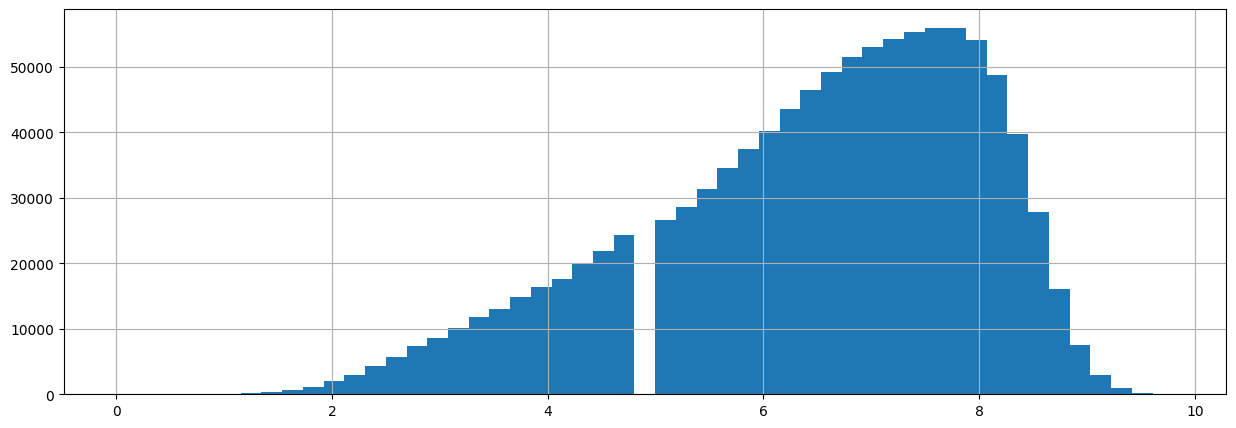

In [9]:
df.toan.hist(bins = 51,figsize = (15,5))

<Axes: >

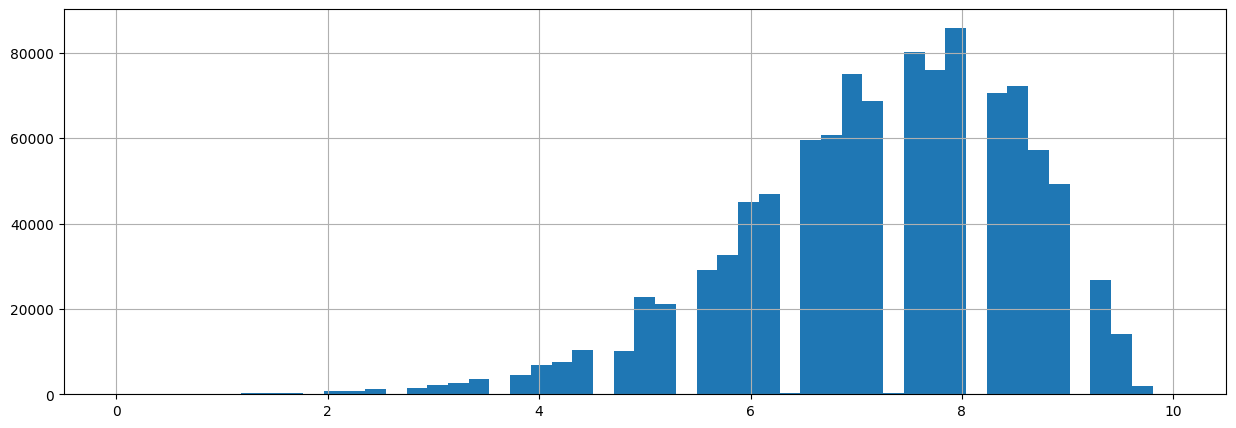

In [10]:
df.ngu_van.hist(bins = 51,figsize = (15,5))

<Axes: >

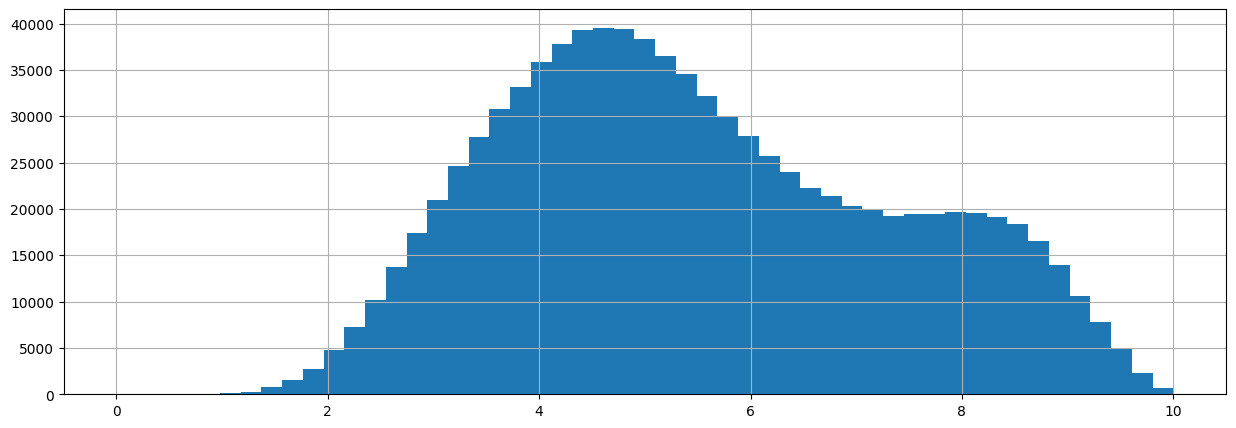

In [11]:
df.ngoai_ngu.hist(bins = 51,figsize = (15,5))

<Axes: >

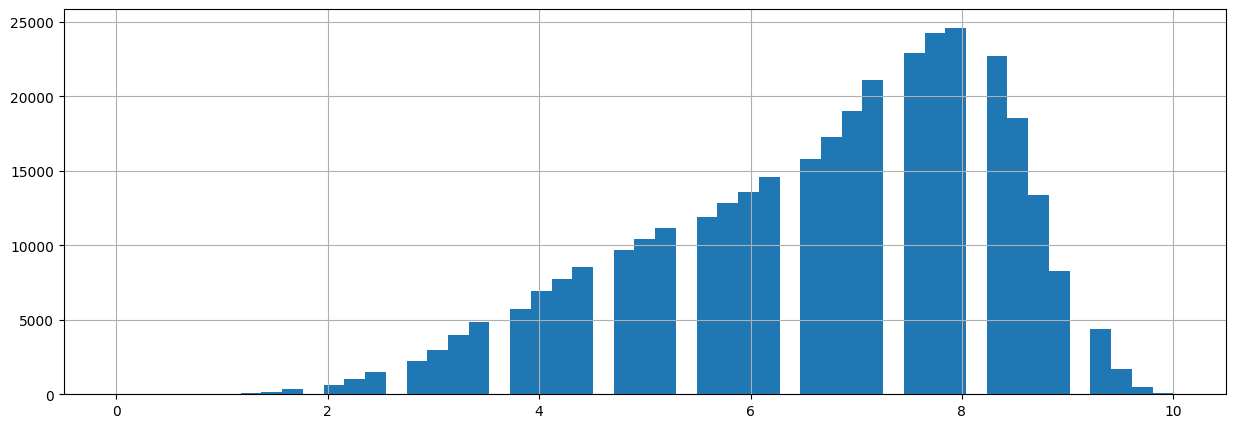

In [12]:
df.vat_li.hist(bins = 51,figsize = (15,5))

<Axes: >

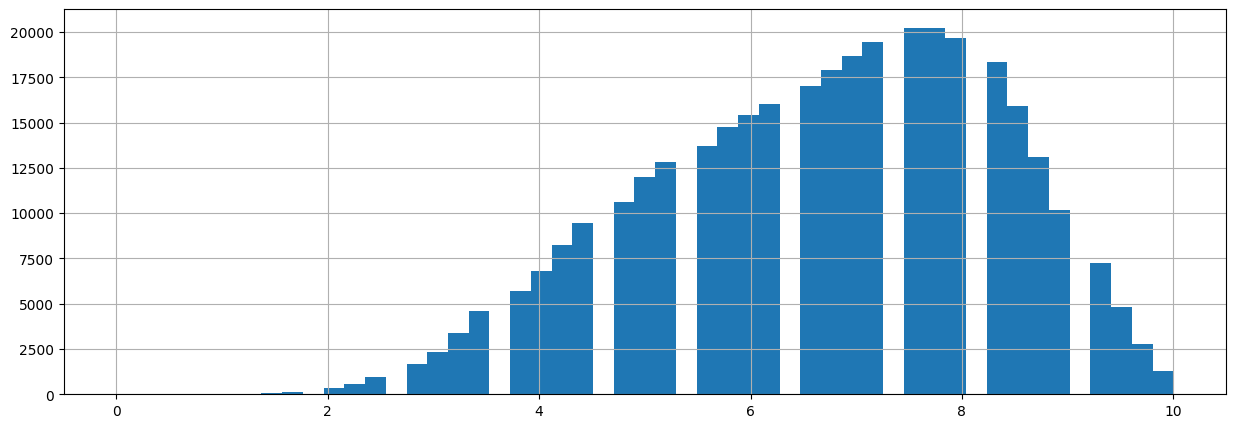

In [13]:
df.hoa_hoc.hist(bins = 51,figsize = (15,5))

<Axes: >

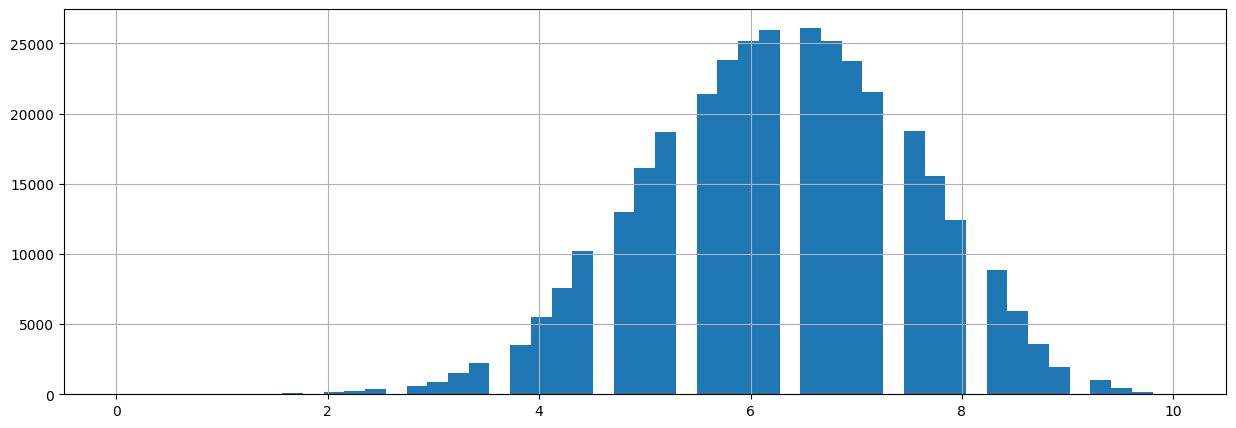

In [14]:
df.sinh_hoc.hist(bins = 51,figsize = (15,5))

<Axes: >

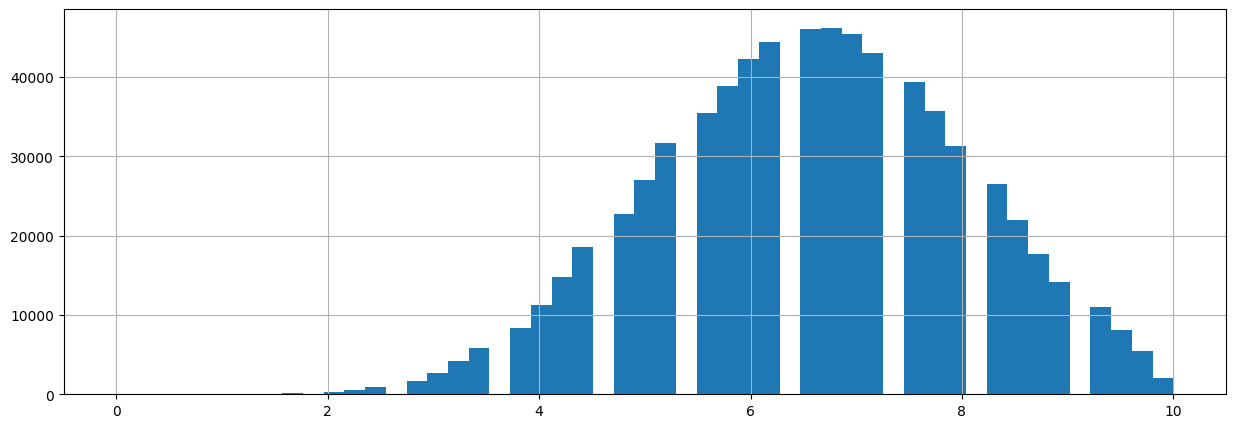

In [15]:
df.lich_su.hist(bins = 51,figsize = (15,5))

<Axes: >

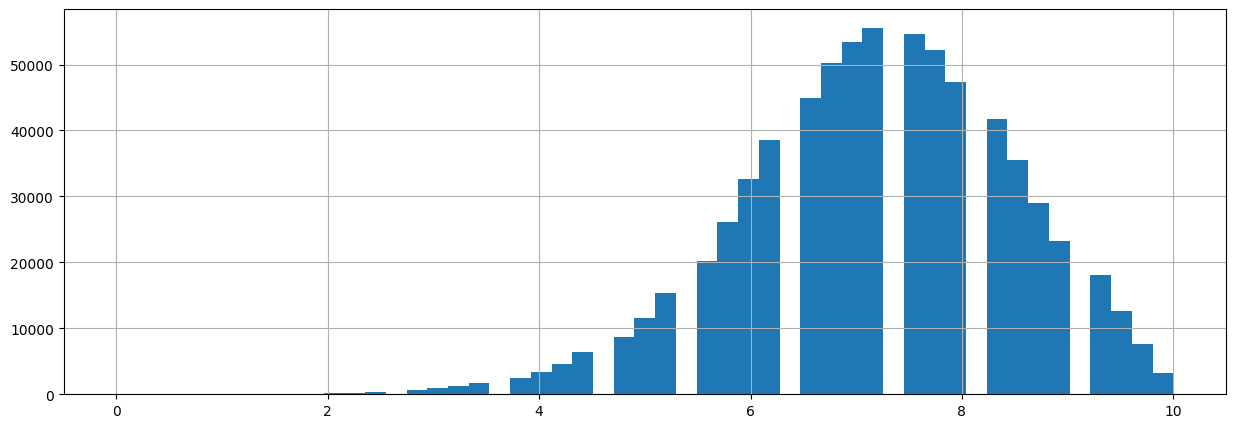

In [16]:
df.dia_li.hist(bins = 51,figsize = (15,5))

<Axes: >

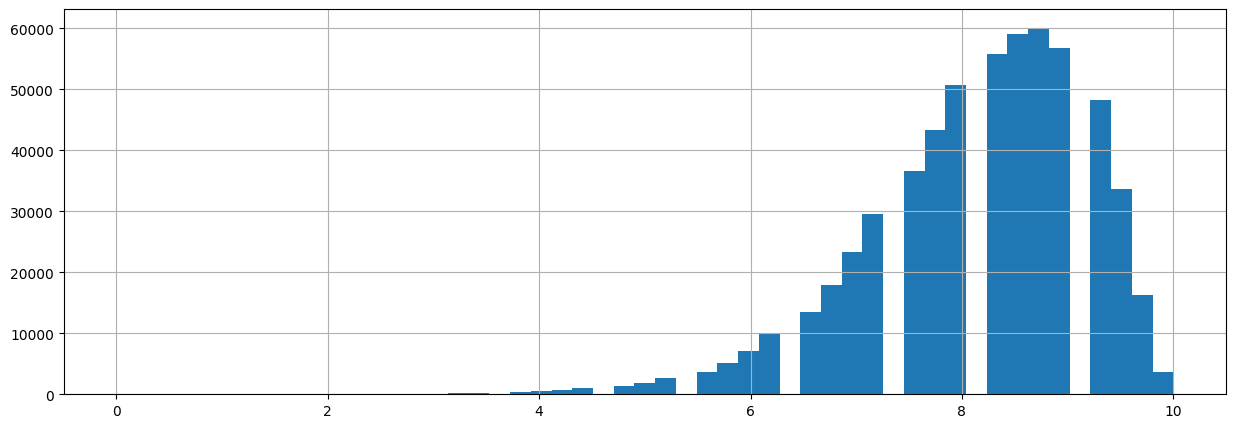

In [17]:
df.gdcd.hist(bins = 51,figsize = (15,5))

### Bước 5: Kiểm tra phổ điểm tỉnh Tây Ninh và so sánh với một số thành phố trực thuộc Trung ương

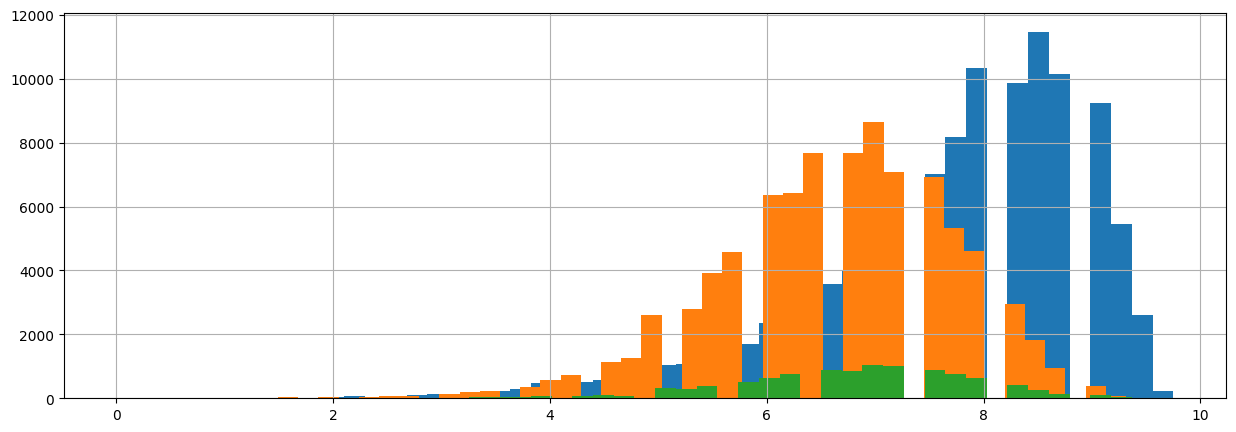

In [18]:
# Ha Noi, Ho Chi Minh, Tay Ninh
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].ngu_van.hist(bins = 51, figsize = (15,5))

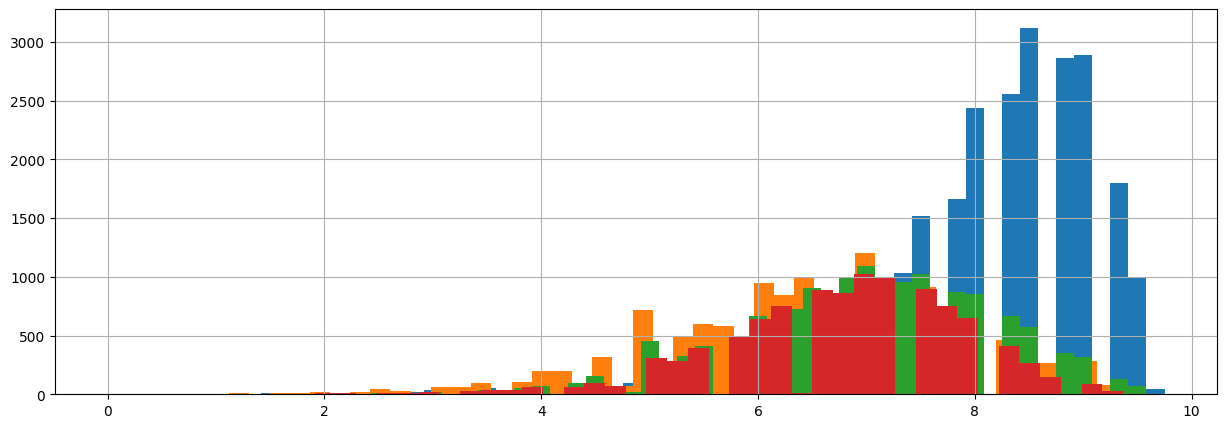

In [19]:
# Hai Phong, Da Nang, Can Tho, Tay Ninh
for ma_tinh in ['03', '04', '55', '46']:
    df[df['ma_tinh'] == ma_tinh].ngu_van.hist(bins = 51, figsize = (15,5))

### Bước 6: Xử lý tổng điểm 5 khối quan trọng

In [20]:
def comboundScore(row):
    toan = row.toan
    li = row.vat_li
    hoa = row.hoa_hoc
    sinh = row.sinh_hoc
    su = row.lich_su
    dia = row.dia_li
    van = row.ngu_van
    nn = row.ngoai_ngu
    
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(hoa) is True:
        a00 = toan + li + hoa
    else:
        a00 = np.nan
        
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(nn) is True:
        a01 = toan + li + nn
    else:
        a01 = np.nan

    if pd.notna(toan) is True and pd.notna(hoa) is True and pd.notna(sinh) is True:
        b00 = toan + hoa + sinh
    else:
        b00 = np.nan
        
    if pd.notna(van) is True and pd.notna(su) is True and pd.notna(dia) is True:
        c00 = van + su + dia
    else:
        c00 = np.nan

    if pd.notna(toan) is True and pd.notna(van) is True and pd.notna(nn) is True:
        d00 = toan + van + nn
    else:
        d00 = np.nan

    if pd.notna(su) is True and pd.notna(van) is True and pd.notna(nn) is True:
        d14 = su + van + nn
    else:
        d14 = np.nan

    return a00, a01, b00, c00, d00, d14

In [21]:
df['a00'], df['a01'], df['b00'], df['c00'], df['d00'], df['d14']  = zip(*df.apply(comboundScore, axis=1))

In [22]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,ma_tinh,a00,a01,b00,c00,d00,d14
0,01000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1,01,19.65,22.4,18.65,NaN,23.15,NaN
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1,01,NaN,NaN,NaN,21.75,24.30,22.95
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1,01,NaN,NaN,NaN,23.25,25.15,24.20
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1,01,NaN,NaN,NaN,21.50,20.70,22.90
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1,01,NaN,NaN,NaN,26.75,25.40,25.80


### Bước 7: Kiểm tra phổ điểm khối A01 và khối C với hai đô thị đặc biệt 

<Axes: >

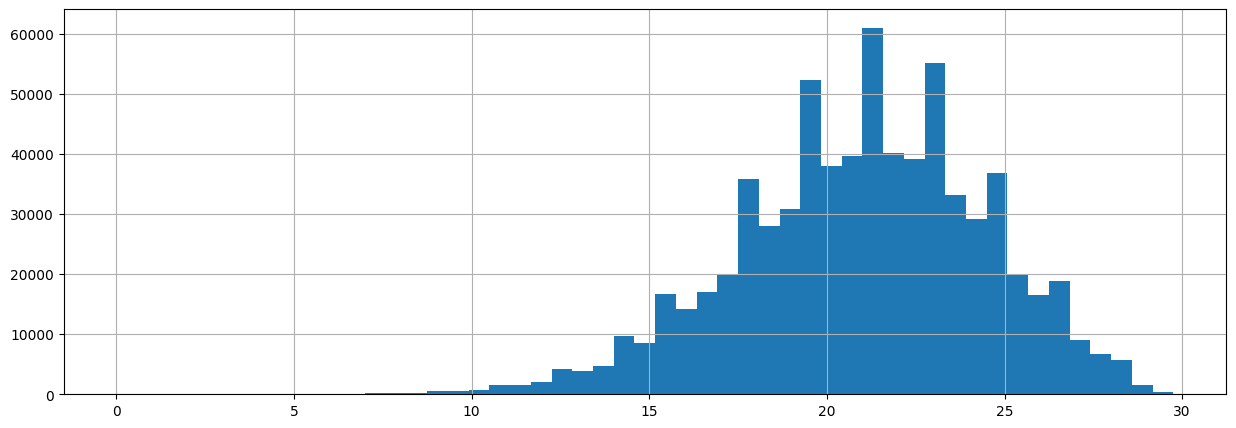

In [23]:
df.c00.hist(bins = 51,figsize = (15,5))

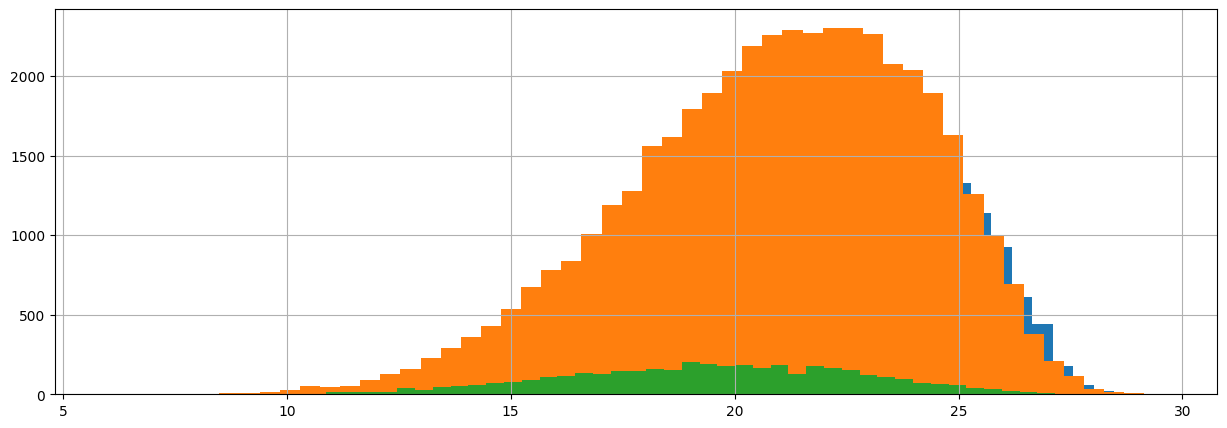

In [24]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].a01.hist(bins = 51, figsize = (15,5))

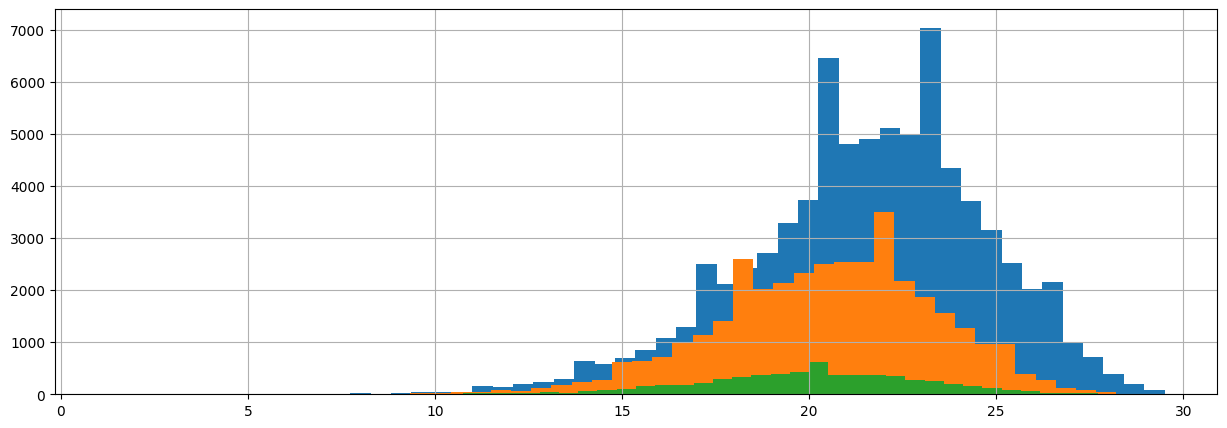

In [25]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].c00.hist(bins = 51, figsize = (15,5))

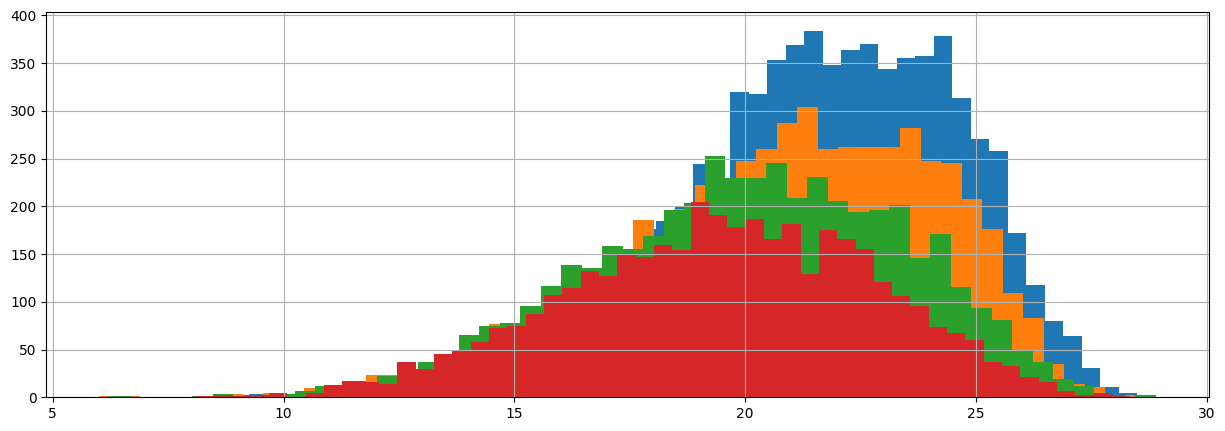

In [26]:
for ma_tinh in ['03', '04', '55', '46']:
    df[df['ma_tinh'] == ma_tinh].a01.hist(bins = 51, figsize = (15,5))

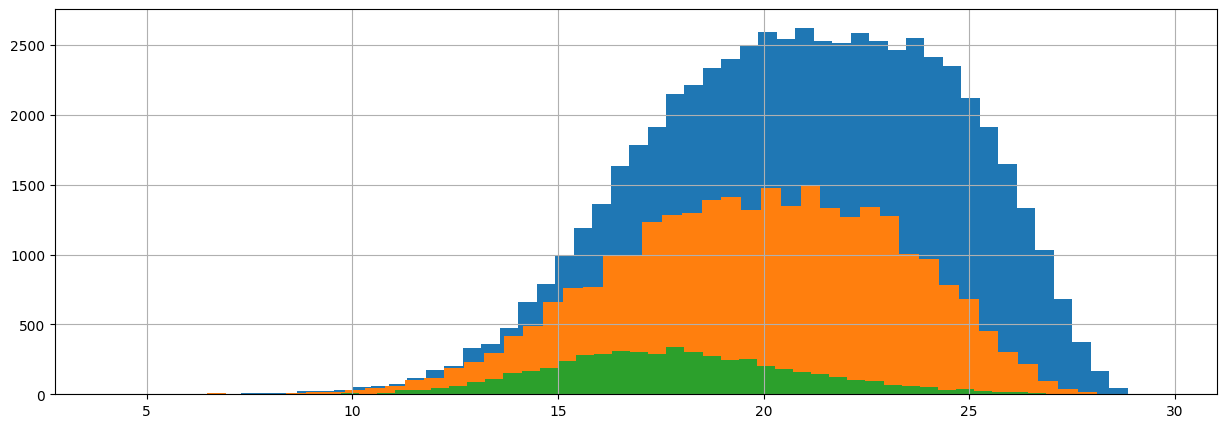

In [27]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].d14.hist(bins = 51, figsize = (15,5))

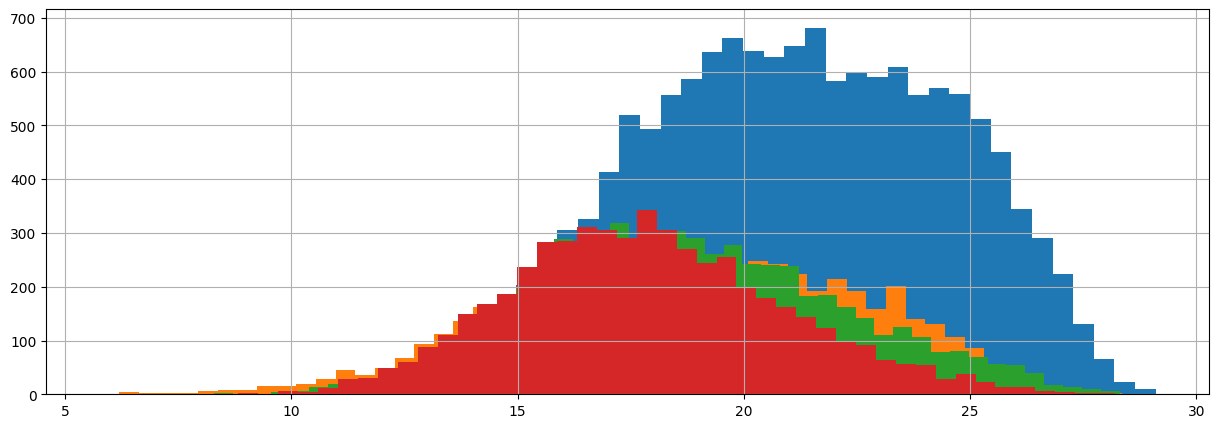

In [28]:
for ma_tinh in ['03', '04', '55', '46']:
    df[df['ma_tinh'] == ma_tinh].d14.hist(bins = 51, figsize = (15,5))

### Bước 8: Lọc dữ liệu toàn tỉnh Tây Ninh

In [29]:
tay_ninh = df[(df.ma_tinh == '46')]
tay_ninh.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,ma_tinh,a00,a01,b00,c00,d00,d14
812837,46000001,7.8,6.50,5.2,6.25,7.25,6.75,NaN,NaN,NaN,N1,46,21.3,19.25,21.8,NaN,19.50,NaN
812838,46000002,6.0,7.00,NaN,NaN,NaN,NaN,7.75,8.25,NaN,,46,NaN,NaN,NaN,23.00,NaN,NaN
812839,46000003,5.6,7.25,5.0,NaN,NaN,NaN,6.50,8.25,9.00,N1,46,NaN,NaN,NaN,22.00,17.85,18.75
812840,46000004,6.2,6.50,6.2,NaN,NaN,NaN,7.25,9.00,9.75,N1,46,NaN,NaN,NaN,22.75,18.90,19.95
812841,46000005,6.8,5.75,3.6,NaN,NaN,NaN,7.00,8.00,9.25,N1,46,NaN,NaN,NaN,20.75,16.15,16.35


### Bước 9: Tiến hành lọc tỷ lệ và vị trí tương ứng

In [30]:
def percentage(sbd, khoi):
    thi_sinh = df[df.sbd == sbd]
    diem = thi_sinh[khoi].values[0]
    ma_tinh = thi_sinh.ma_tinh.values[0]
    df_tinh = df[(df.ma_tinh == ma_tinh)]
    ti_le_tinh = len(df_tinh[(df_tinh[khoi] >= diem)]) / len(df_tinh[(df_tinh[khoi] >= 0)])
    ti_le_quoc_gia = len(df[(df[khoi] >= diem)]) / len(df[(df[khoi] >= 0)])
    
    print('''Điểm khối {} của thí sinh {} là: {}. Thuộc top:
    {:%} tỉnh
    {:%} quốc gia'''.format(khoi, sbd, diem, ti_le_tinh, ti_le_quoc_gia))

In [31]:
percentage('46000124', 'a01')

Điểm khối a01 của thí sinh 46000124 là: 23.6. Thuộc top:
    10.460460% tỉnh
    18.968283% quốc gia


In [35]:
percentage('46000124', 'd00')

Điểm khối d00 của thí sinh 46000124 là: 22.1. Thuộc top:
    13.826022% tỉnh
    25.990850% quốc gia


In [36]:
percentage('46000124', 'a00')

Điểm khối a00 của thí sinh 46000124 là: 20.6. Thuộc top:
    47.359329% tỉnh
    57.894706% quốc gia


In [34]:
percentage('46002161', 'd00')

Điểm khối d00 của thí sinh 46002161 là: 19.75. Thuộc top:
    34.827845% tỉnh
    49.123083% quốc gia
